<a href="https://colab.research.google.com/github/880121andy/NSYSU/blob/main/HW03_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 標題：YouTube千大熱門影片分析報告

## 摘要

本報告基於 Kaggle 上 Samith Chimminiyan 用戶提供的 ['1000 Most Trending YouTube Videos'](https://www.kaggle.com/datasets/samithsachidanandan/1000-most-trending-youtube-videos/data?select=top-1000-trending-youtube-videos.csv) 資料集，分析探討最熱門的影片類別、影片觀看次數與按讚數的關係，以及不同影片類別的按讚率比較。透過數據視覺化與統計分析，提供對YouTube影片的趨勢觀察，並嘗試給予影片創作者或團隊可能的建議。

## 引言

### 背景
YouTube最為近代最熱門的影音平台，越來越多創作者踏入YouTuber行業，期待追求觀眾的青睞及流量，對熱門影片的分析將有利創作者調整經營方向及影片類型選擇。

### 目的
本研究的目標是透過數據分析，找出熱門影片的趨勢，提供創作者團隊參考，並以此作為經營策略。

### 待答問題
1. 最常出現在熱門影片前100名的影片類型？
2. 觀看次數與按讚數的關係？
3. 不同影片類型的按讚率比較？

## 方法

### 數據來源
本研究使用 Kaggle 上開源的數據集，該數據集蒐集截至2025/04/10的前一千部熱門影片，及其相關的數據如下:

Rank,
Video,
Video Views,
Dislike,
Category,
Published

### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Numpy**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）

### 數據處理
1. 從 Kaggle Api 獲取 ['1000 Most Trending YouTube Videos'](https://www.kaggle.com/datasets/samithsachidanandan/1000-most-trending-youtube-videos/data?select=top-1000-trending-youtube-videos.csv) 資料集到Cola檔案中。
2. 探索性數據分析（EDA）以了解數據分佈與異常值。
3. 繪製長條圖、散點圖，分析關鍵變數之間的關係。

### 從Kaggle獲取數據

In [ ]:
# install kaggle
!pip install -q kaggle

In [ ]:
# upload kaggle api key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yuchiehwang01","key":"cb8eca670287f889a6ce86d917125204"}'}

In [ ]:
# create a new directory for kaggle
! mkdir ~/.kaggle
# copy the kaggle.json(api key) file to the directory
! cp kaggle.json ~/.kaggle/
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samithsachidanandan/1000-most-trending-youtube-videos")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/1000-most-trending-youtube-videos


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# 載入數據集
file = '/kaggle/input/1000-most-trending-youtube-videos/top-1000-trending-youtube-videos.csv'
df = pd.read_csv(file)

# 顯示數據的前五筆
print(df.head())



   rank                                              Video    Video views  \
0     1  20 Tennis shots if they were not filmed, NOBOD...      3,471,237   
1     2  Lil Nas X - Old Town Road (Official Movie) ft....     54,071,677   
2     3                 JoJo Siwa - Karma (Official Video)     34,206,747   
3     4  Wiz Khalifa - See You Again ft. Charlie Puth [...  6,643,904,918   
4     5                       伊賀の天然水強炭酸水「家族で、シュワシェア。」篇　15秒    236,085,971   

        Likes Dislikes Category  published  
0      19,023      859      NaN       2017  
1   3,497,955   78,799    Music       2019  
2     293,563      NaN    Music       2024  
3  44,861,602      NaN    Music       2015  
4          38      NaN      NaN       2021  


In [ ]:
# 顯示數據基本資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        973 non-null    object
 4   Dislikes     687 non-null    object
 5   Category     820 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


## 結果與分析

### 計算最常出現在熱門影片前100名的影片類型
使用長條圖來顯示最常出現在熱門影片排名(Rank)前100名的影片類型(Category)

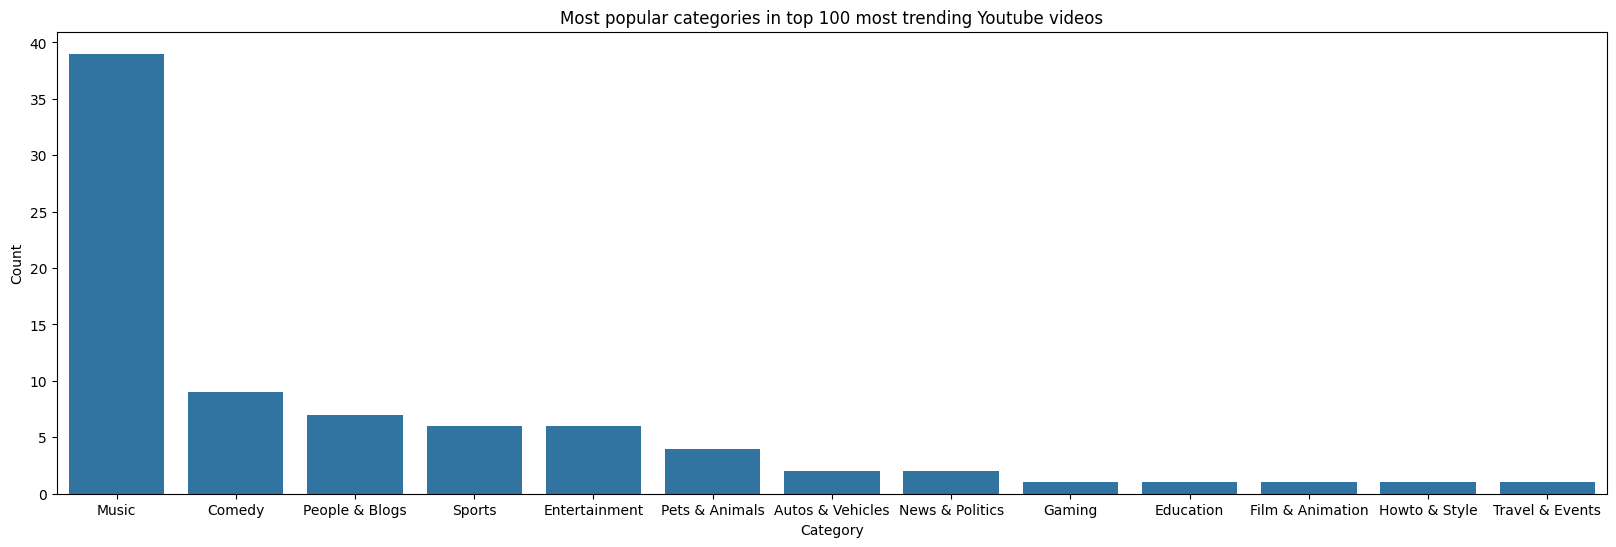

In [ ]:
# 篩選熱門影片排名(rank)前30名的影片
top_100_df = df[df['rank'] <= 100]

# 計算每個影片類型(category)的出現次數
category_counts = top_100_df['Category'].value_counts()

# 繪製長條圖
plt.figure(figsize=(20, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Most popular categories in top 100 most trending Youtube videos')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


**分析結果**：從圖中可以看出，音樂類影片在熱門影片前100名中佔據顯著比例，表明其更容易進入熱門影片行列。

### 觀察觀看次數與按讚數的關係
使用散點圖觀察，影片的觀看次數(Video views)及其按讚數(Likes)之間的關係。

In [ ]:
# 把原本是object的['Video views']轉換為int，以方便後面計算及繪圖，並且移除','以確保object能成功轉換成int
df['Video views'] = df['Video views'].str.replace(',', '').astype('int64')
df['Likes'] = df['Likes'].str.replace(',', '').fillna(0).astype('int64') #column中有空值，需要先補0
df['Dislikes'] = df['Dislikes'].str.replace(',', '').fillna(0).astype('int64') #column中有空值，需要先補0

In [ ]:
df.head()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,"20 Tennis shots if they were not filmed, NOBOD...",3471237,19023,859,NaN,2017
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,54071677,3497955,78799,Music,2019
2,3,JoJo Siwa - Karma (Official Video),34206747,293563,0,Music,2024
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,6643904918,44861602,0,Music,2015
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,236085971,38,0,NaN,2021


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   int64 
 3   Likes        1000 non-null   int64 
 4   Dislikes     1000 non-null   int64 
 5   Category     820 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


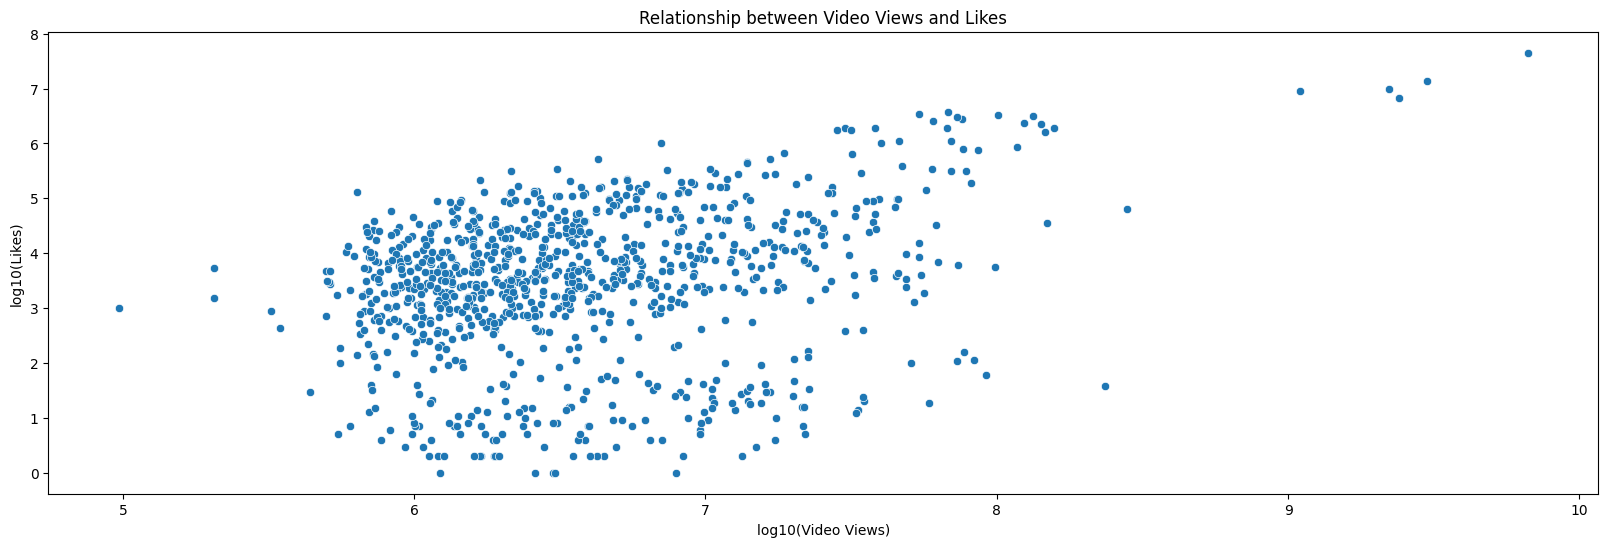

In [ ]:
import numpy as np

# 由於兩者的原始數據數值差距過於懸殊，故使用log10轉換，使圖形能夠清楚呈現，以便於觀察趨勢
df_log = df[(df['Video views'] > 0) & (df['Likes'] > 0)].copy() # 為了避免 log(0) 的錯誤，因此選擇不保留補0的空值
df_log['log_views'] = np.log10(df_log['Video views'])
df_log['log_likes'] = np.log10(df_log['Likes'])

plt.figure(figsize=(20, 6))
sns.scatterplot(x='log_views', y='log_likes', data=df_log)
plt.title('Relationship between Video Views and Likes')
plt.xlabel('log10(Video Views)')
plt.ylabel('log10(Likes)')
plt.show()


**分析結果**：影片觀看次數及按讚數之間大致呈現正相關，但兩者關係並非完全線性

### 不同影片類型的按讚率比較
比較不同影片類型中，觀眾選擇按讚，而非按不喜歡的傾向。

<ipython-input-84-5867b78939a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Likes ratio'] = df2['Likes'] / (df2['Likes'] + df2['Dislikes'])


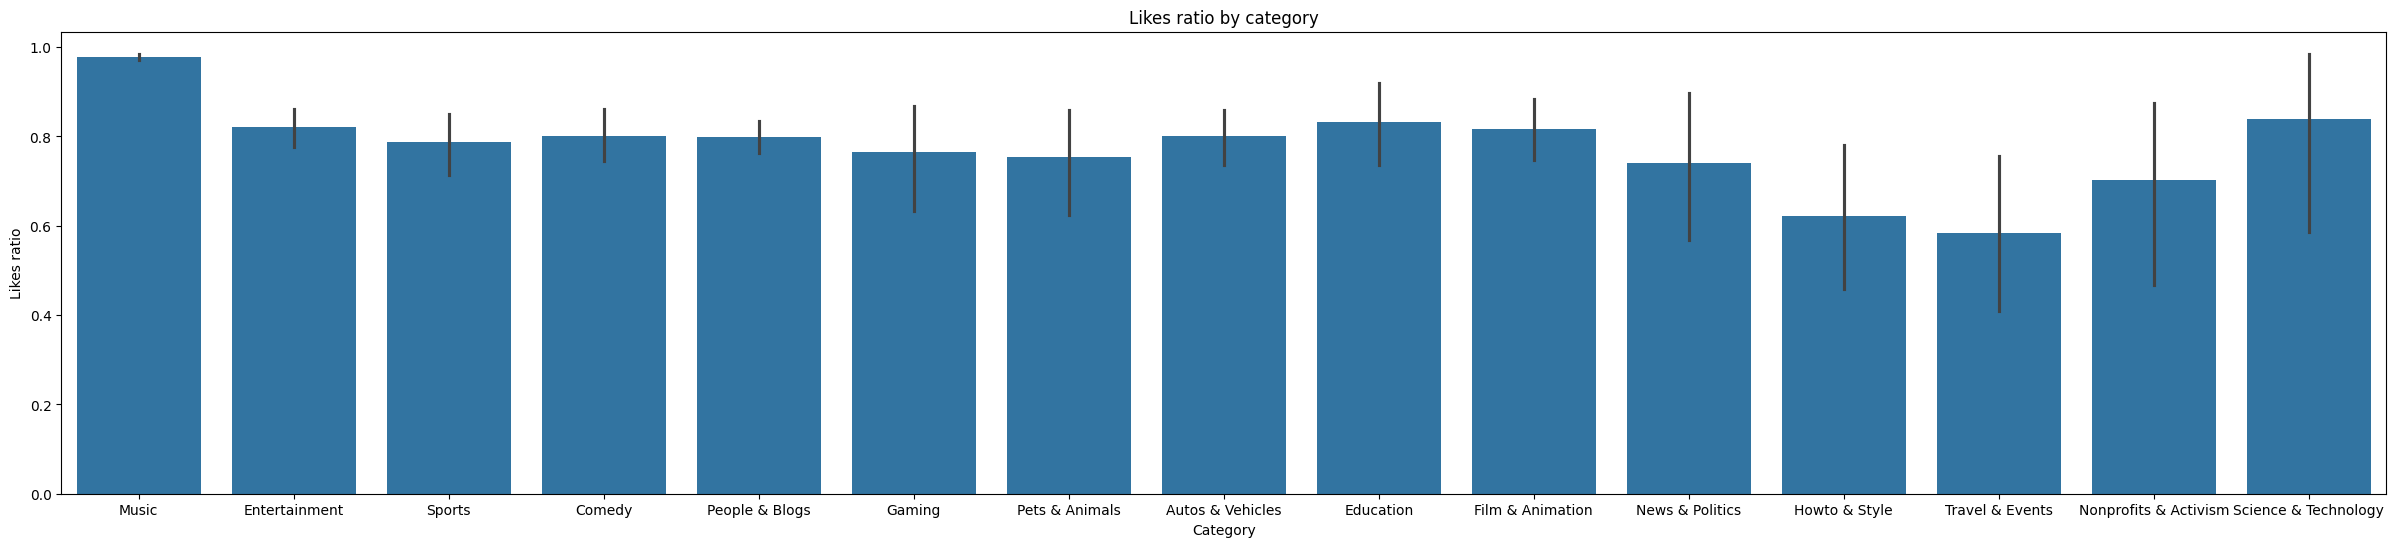

In [ ]:
# 去除可能為0的 dislike 值，避免除以0
df2 = df[(df["Likes"] + df["Dislikes"]) > 0]


df2['Likes ratio'] = df2['Likes'] / (df2['Likes'] + df2['Dislikes'])
avg_likes_ratio = df2.groupby('Category')['Likes ratio'].mean()



plt.figure(figsize=(30, 6))
sns.barplot(x="Category", y="Likes ratio", data=df2)
plt.title("Likes ratio by category")
plt.xlabel("Category")
plt.ylabel("Likes ratio")
plt.show()

**分析結果**：
- 音樂類影片的按讚率最高，顯示其觀眾的忠實度高。
- 旅遊及事件類型影片按讚率最低，顯示此類型影片可能並非大多數觀眾的主要興趣。

## 結論與建議


### 結論
1. 音樂類型影片在熱門影片中佔了非常高的比例。
2. 影片觀看數與按讚數有正相關關係。
3. 音樂類型影片的按讚率明顯比其他類型影片高。

### 建議
1. 音樂類別的影片有非常高的潛力，在獲得流量及觀眾喜好的考量中為眾多影片類型的首選。
2. 獲得更高的讚數的影片或許更能夠得到演算法的推薦，因而獲得更高的觀看人次。
3. 音樂類影片的觀眾有較高的忠誠度，更容易獲得更多的觀眾喜愛。




## 參考資料

* [Kaggle Dataset](https://www.kaggle.com/datasets/samithsachidanandan/1000-most-trending-youtube-videos/data?select=top-1000-trending-youtube-videos.csv)
* [(YouTube) Import Kaggle Datasets Tutorial](https://www.youtube.com/watch?v=57N1g8k2Hwc)

